In [ ]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import pyplot as plt
from IPython.display import display, Markdown
from sklearn.metrics import classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# anomaly-free df loading
df = pd.read_csv('x.csv', sep=';',  index_col='datetime', parse_dates=True)

In [ ]:
# classifier initializing
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0, 
                      n_jobs=-1,
                      contamination=0.01)

In [ ]:
X_train = df[:400].drop(['anomaly','changepoint'], axis=1)

clf.fit(X_train)

prediction = pd.Series(clf.predict(df.drop(['anomaly','changepoint'], axis=1))*-1, 
                            index=df.index).fillna(0).replace(-1,0)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(df.reset_index()['anomaly'].to_numpy(), prediction.to_numpy()))

              precision    recall  f1-score   support

         0.0       0.78      0.83      0.80       741
         1.0       0.76      0.70      0.73       586

    accuracy                           0.77      1327
   macro avg       0.77      0.76      0.77      1327
weighted avg       0.77      0.77      0.77      1327



In [ ]:
print(f1_score(df.reset_index()['anomaly'].to_numpy(), prediction.to_numpy()))

0.7306666666666667


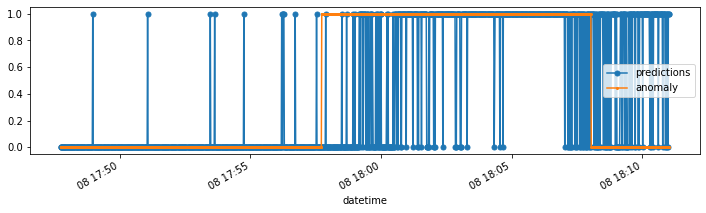

In [ ]:
prediction.plot(figsize=(12,3), label='predictions', marker='o', markersize=5)
df.anomaly.plot(marker='o', markersize=2)
plt.legend();

In [ ]:
filename = 'isolation_forest.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model

IsolationForest(contamination=0.01, n_jobs=-1, random_state=0)